<a href="https://colab.research.google.com/github/Alriyan1/Data_Visualization_Tutorial/blob/main/eda_timeSeriesData_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df=yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [4]:
df.columns = df.columns.map(lambda x: x[0])

In [5]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


<Axes: xlabel='Date'>

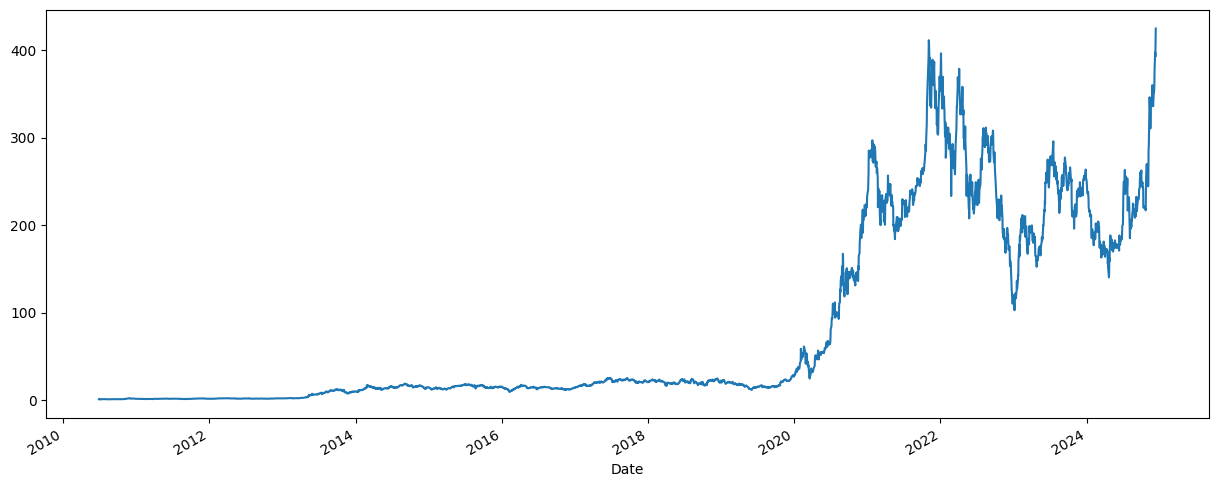

In [6]:
df['Open'].plot(figsize=(15,6))

In [7]:
# simple mean average

df['Open:10 days rolling']=df['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

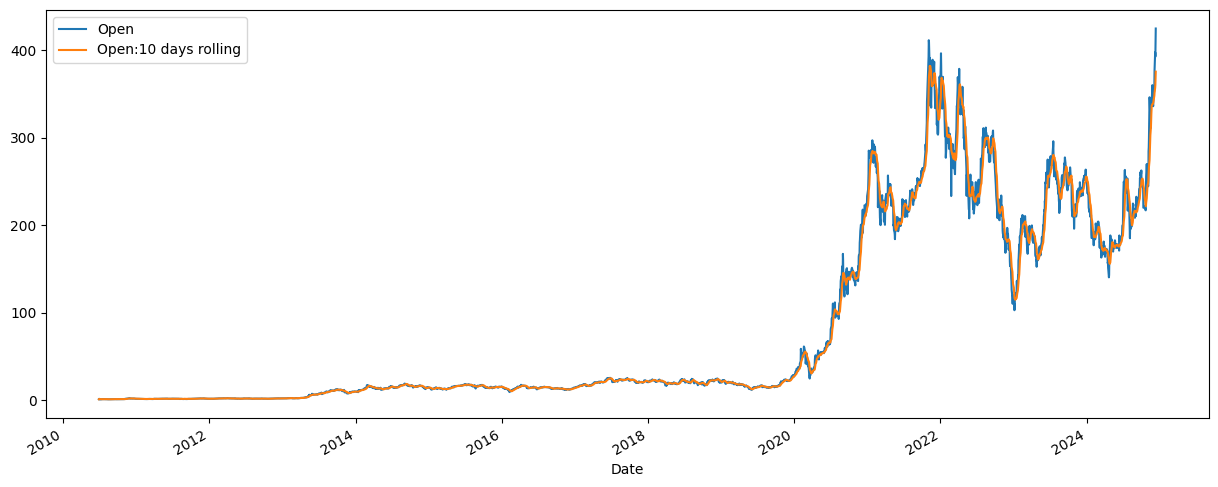

In [8]:
df[['Open','Open:10 days rolling']].plot(figsize=(15,6))

In [9]:
df['Open:30 days rolling']=df['Open'].rolling(window=30,min_periods=1).mean()
df['Open:50 days rolling']=df['Open'].rolling(window=50,min_periods=1).mean()


<Axes: xlabel='Date'>

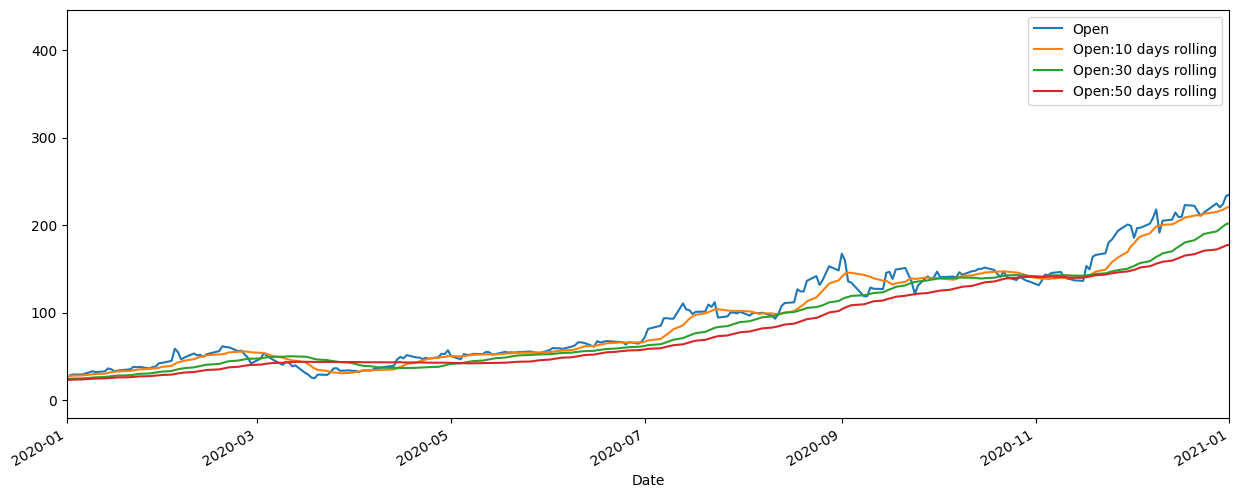

In [10]:
df[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))


<Axes: xlabel='Date'>

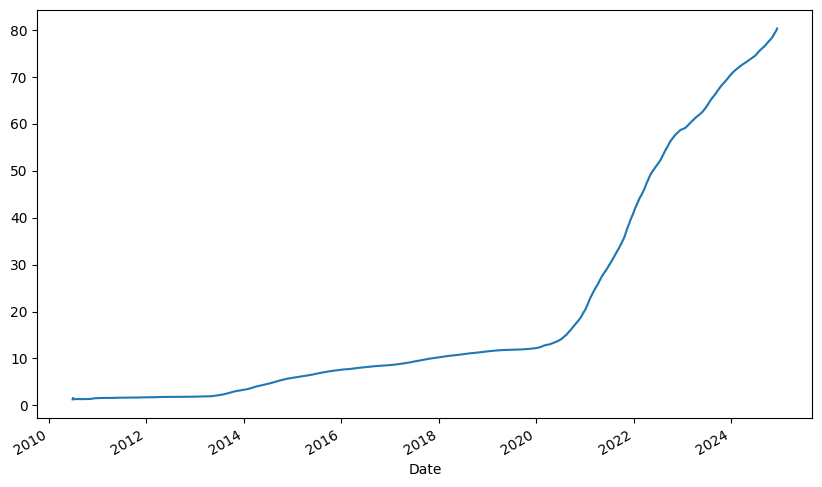

In [13]:
# Cummulative moving average

df['Open'].expanding().mean().plot(figsize=(10,6))

In [14]:
# EMA
df['EMA_1.0']=df['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

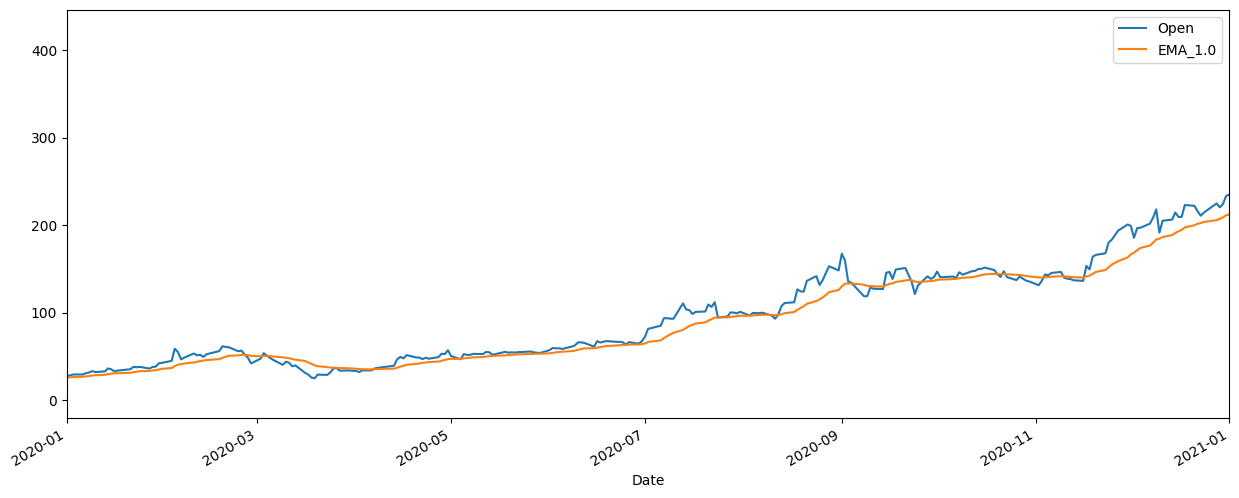

In [15]:
df[['Open','EMA_1.0']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))


<Axes: xlabel='Date'>

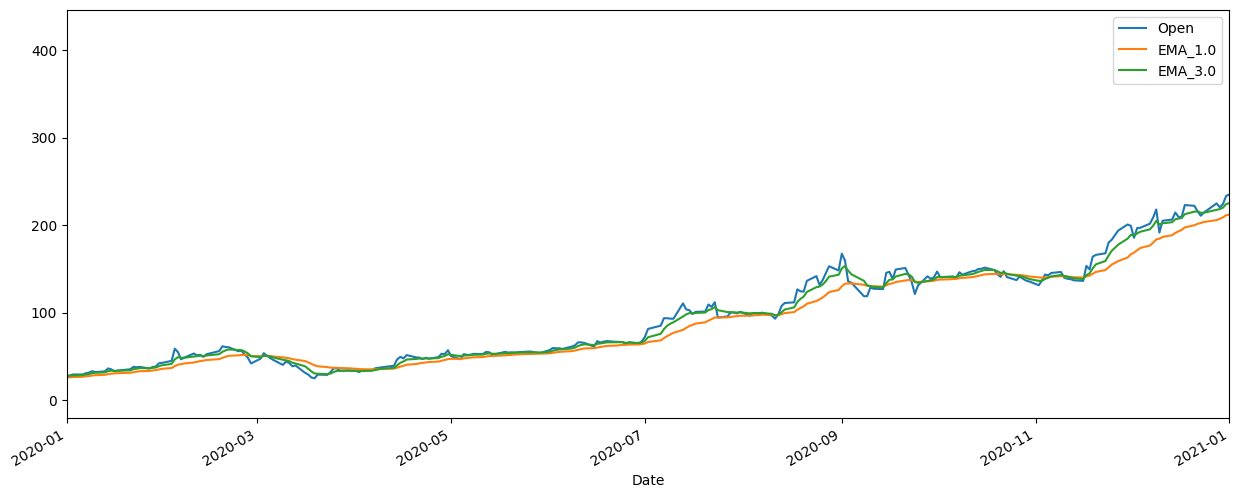

In [16]:
df['EMA_3.0']=df['Open'].ewm(alpha=0.3,adjust=False).mean()
df[['Open','EMA_1.0',"EMA_3.0"]].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))


In [17]:
df['EMA_5days']=df['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

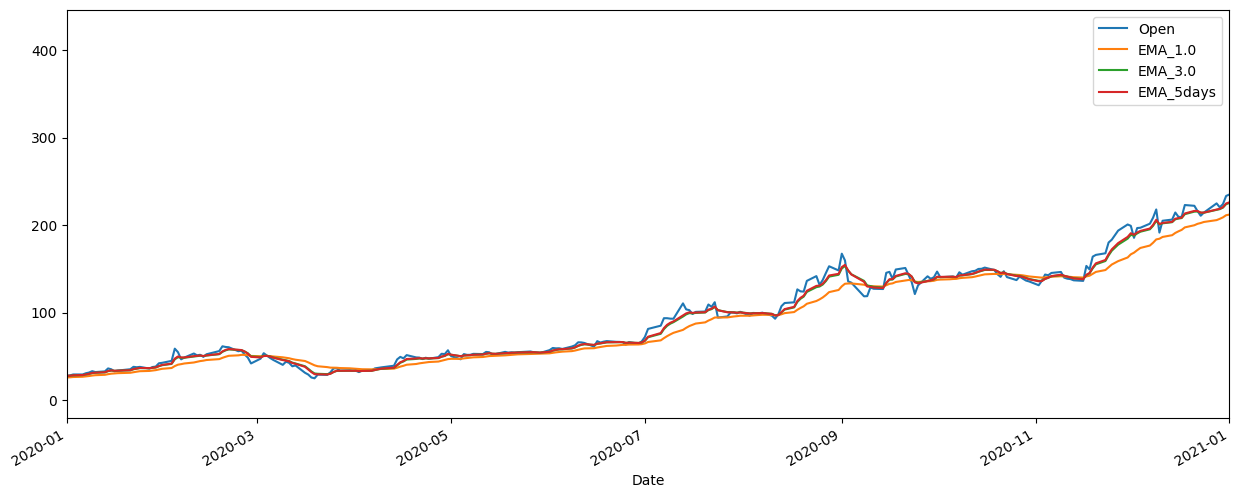

In [22]:
df[['Open','EMA_1.0','EMA_3.0','EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))